--------------------------------------------
# Title: "Data-Driven Placement Insights & Student Employability Prediction"
--------------------------------------------

1 — Importing Libraries & Setting Theme

In [56]:
# --------------------------------------------
# 🧩 Step 1: Import Required Libraries
# --------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization settings
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8, 4)


2 - Load & Inspect Dataset

In [57]:
# --------------------------------------------
# 🧩 Step 2: Load Dataset & Basic Inspection
# --------------------------------------------
df = pd.read_csv("placement_dataset_final.csv")

print("✅ Dataset Loaded Successfully")
print("\nFirst 5 Rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe(include="all"))

print("\nMissing Values:")
print(df.isnull().sum())

✅ Dataset Loaded Successfully

First 5 Rows:


,Student_ID,Name,Gender,Age,Degree,Specialization,CGPA,Internship,Certifications,Projects,Soft_Skills_Score,Placement_Status,Placement_Date,Package_LPA,Company_Name
0,STU001,Pooja Reddy,Male,22,BCA,AI/ML,8.12,Yes,3.0,0,5,Not Placed,NaN,NaN,NaN
1,STU002,Neha Kumar,Male,20,B.Tech,DS,8.14,No,1.0,6,3,Not Placed,NaN,NaN,NaN
2,STU003,Manish Agarwal,Male,21,MCA,DS,8.97,No,2.0,3,1,Placed,2024-09-15,10.44,Accenture
3,STU004,Aditya Bansal,Female,20,BCA,AI/ML,8.94,No,4.0,6,8,Not Placed,NaN,NaN,NaN
4,STU005,Tanya Sharma,Male,23,BSc,AI/ML,6.24,No,3.0,2,1,Not Placed,NaN,NaN,NaN



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         225 non-null    object 
 1   Name               225 non-null    object 
 2   Gender             225 non-null    object 
 3   Age                225 non-null    int64  
 4   Degree             225 non-null    object 
 5   Specialization     225 non-null    object 
 6   CGPA               217 non-null    float64
 7   Internship         225 non-null    object 
 8   Certifications     218 non-null    float64
 9   Projects           225 non-null    int64  
 10  Soft_Skills_Score  225 non-null    int64  
 11  Placement_Status   225 non-null    object 
 12  Placement_Date     114 non-null    object 
 13  Package_LPA        114 non-null    float64
 14  Company_Name       114 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 26.5+ KB



3 - Data Cleaning & Preprocessing

In [60]:
# --------------------------------------------
# 🧩 Step 3: Handle Missing Values & Duplicates
# --------------------------------------------
num_cols = ['CGPA', 'Certifications']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

print("\n✅ Missing Values Filled:")
print(df.isnull().sum())

# Remove duplicates
print("\nDuplicate rows before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicate rows after:", df.duplicated().sum())



✅ Missing Values Filled:
Student_ID             0
Name                   0
Gender                 0
Age                    0
Degree                 0
Specialization         0
CGPA                   0
Internship             0
Certifications         0
Projects               0
Soft_Skills_Score      0
Placement_Status       0
Placement_Date       108
Package_LPA          108
Company_Name           0
dtype: int64

Duplicate rows before: 0
Duplicate rows after: 0


4 - Data Type Conversion & Standardization

In [61]:
# --------------------------------------------
# 🧩 Step 4: Data Type Conversion & Standardization
# --------------------------------------------
df['Placement_Date'] = pd.to_datetime(df['Placement_Date'], errors='coerce')
df['Age'] = df['Age'].astype('Int64')
df['CGPA'] = df['CGPA'].astype(float)
df['Package_LPA'] = df['Package_LPA'].astype(float)

for col in df.columns:
    if col in ['Placement_Status', 'Gender', 'Name']:
        df[col] = df[col].str.strip().str.title()
    elif col == 'Internship':
        df[col] = df[col].fillna("Unknown").str.strip().str.title()
    elif col in ['Degree', 'Specialization']:
        df[col] = df[col].str.strip().str.upper()
    elif col == 'Company_Name':
        df[col] = df[col].fillna("Not Applicable").str.strip().str.title()

print("✅ Data Cleaning Completed")
df.info()

print("\nUnique values :")
print(df['Internship'].unique())
print(df['Placement_Status'].unique())
print(df['Gender'].unique())
print(df['Degree'].unique())


✅ Data Cleaning Completed
<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 219
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Student_ID         220 non-null    object        
 1   Name               220 non-null    object        
 2   Gender             220 non-null    object        
 3   Age                220 non-null    Int64         
 4   Degree             220 non-null    object        
 5   Specialization     220 non-null    object        
 6   CGPA               220 non-null    float64       
 7   Internship         220 non-null    object        
 8   Certifications     220 non-null    float64       
 9   Projects           220 non-null    int64         
 10  Soft_Skills_Score  220 non-null    int64         
 11  Placement_Status   220 non-null    object        
 12  Placement_Date     112 non-null    datetime64[ns]
 13  Package_LPA        112 non-null    float64  

** Make a copy & save dataset for POWER BI Dashboard. **

In [65]:
# --------------------------------------------
# Copy & Save Dataset for POWER BI Dashboard
# --------------------------------------------
viz_df = df.copy()
viz_df.to_csv("placement_dashboard_dataset.csv", index=False)
viz_df.head()

,Student_ID,Name,Gender,Age,Degree,Specialization,CGPA,Internship,Certifications,Projects,Soft_Skills_Score,Placement_Status,Placement_Date,Package_LPA,Company_Name
0,STU001,Pooja Reddy,Male,22,BCA,AI/ML,8.12,Yes,3.0,0,5,Not Placed,NaT,NaN,Not Applicable
1,STU002,Neha Kumar,Male,20,B.TECH,DS,8.14,No,1.0,6,3,Not Placed,NaT,NaN,Not Applicable
2,STU003,Manish Agarwal,Male,21,MCA,DS,8.97,No,2.0,3,1,Placed,2024-09-15,10.44,Accenture
3,STU004,Aditya Bansal,Female,20,BCA,AI/ML,8.94,No,4.0,6,8,Not Placed,NaT,NaN,Not Applicable
4,STU005,Tanya Sharma,Male,23,BSC,AI/ML,6.24,No,3.0,2,1,Not Placed,NaT,NaN,Not Applicable


5 - Correlation & Pairwise Analysis

Correlation Analysis


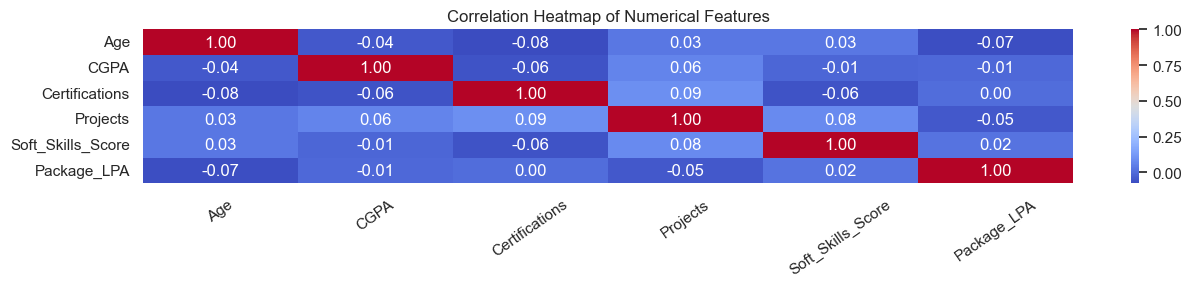

Pairwise Analysis


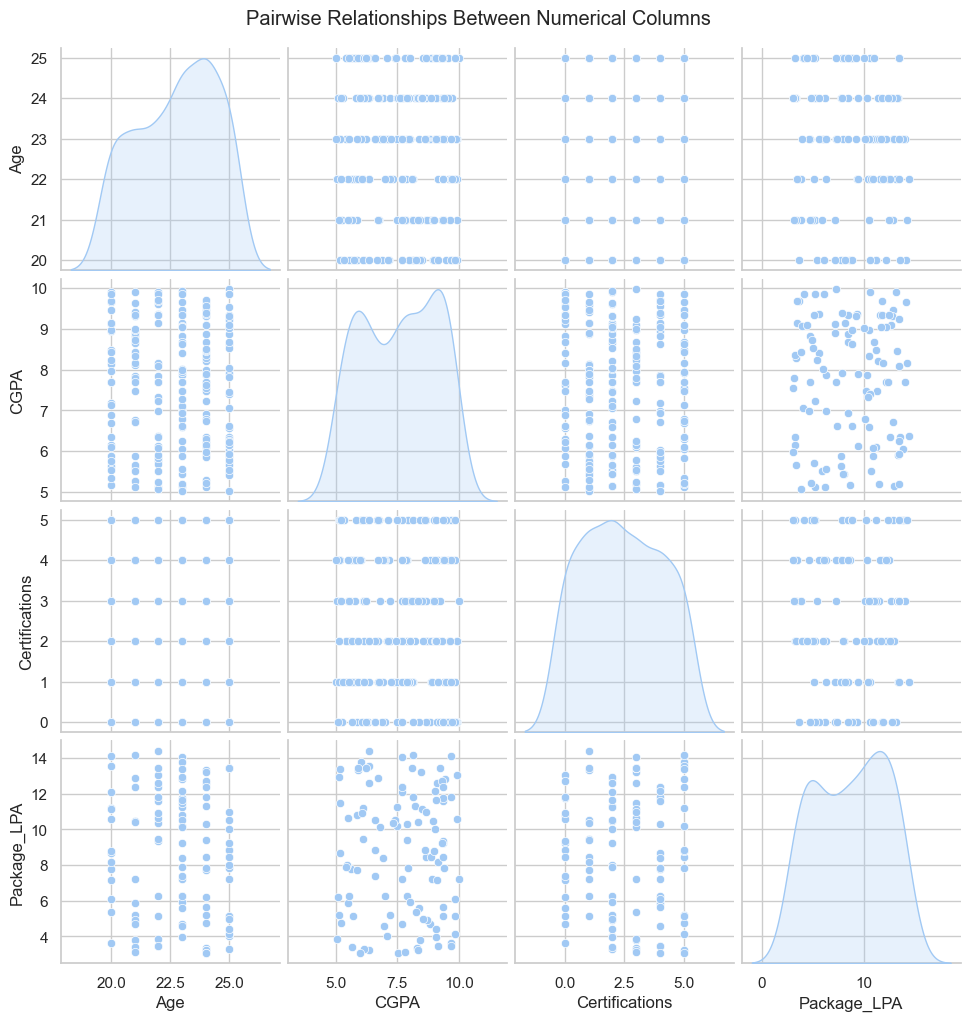

In [20]:
# --------------------------------------------
# 🧩 Step 5: Correlation & Pairwise Analysis
# --------------------------------------------
print("Correlation Analysis")
plt.figure(figsize=(15, 2))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tick_params(axis='x', rotation=35)
plt.show()

print("Pairwise Analysis")
sns.pairplot(df[['Age', 'CGPA', 'Certifications', 'Package_LPA']], diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Numerical Columns", y=1.02)
plt.show()

6 - Univariate Analysis

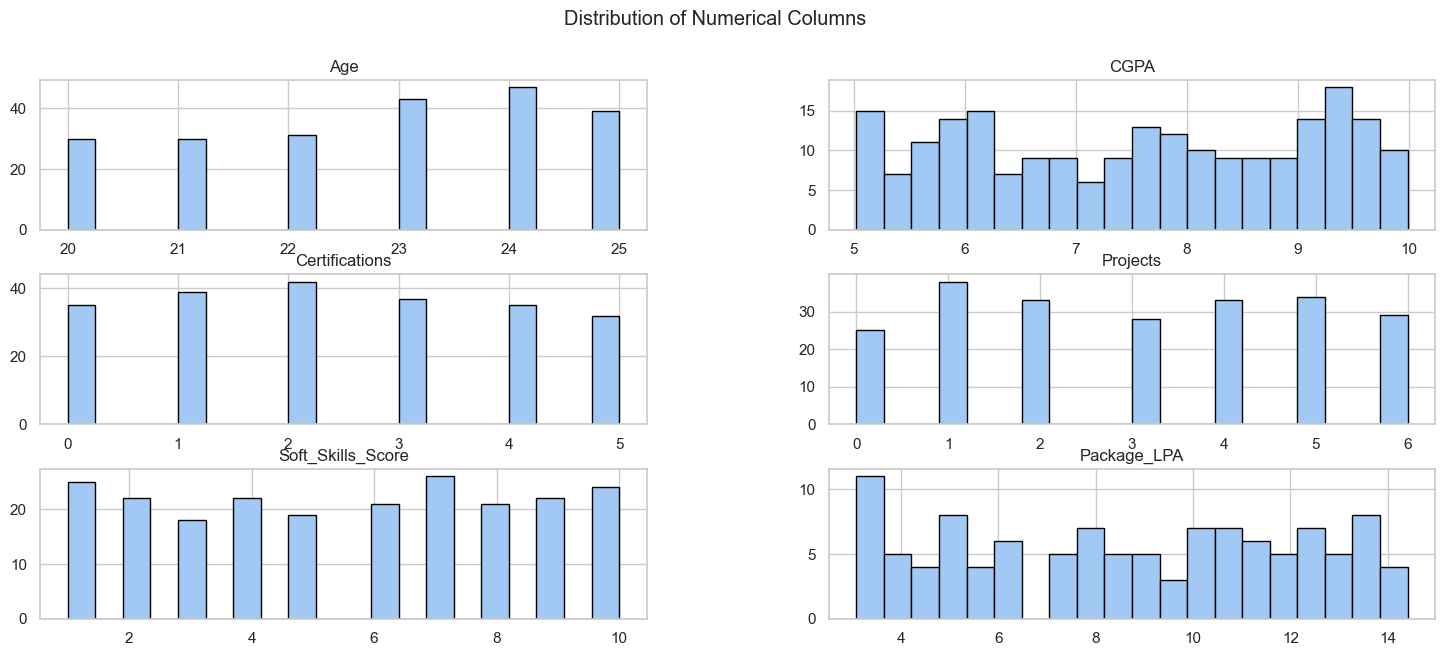

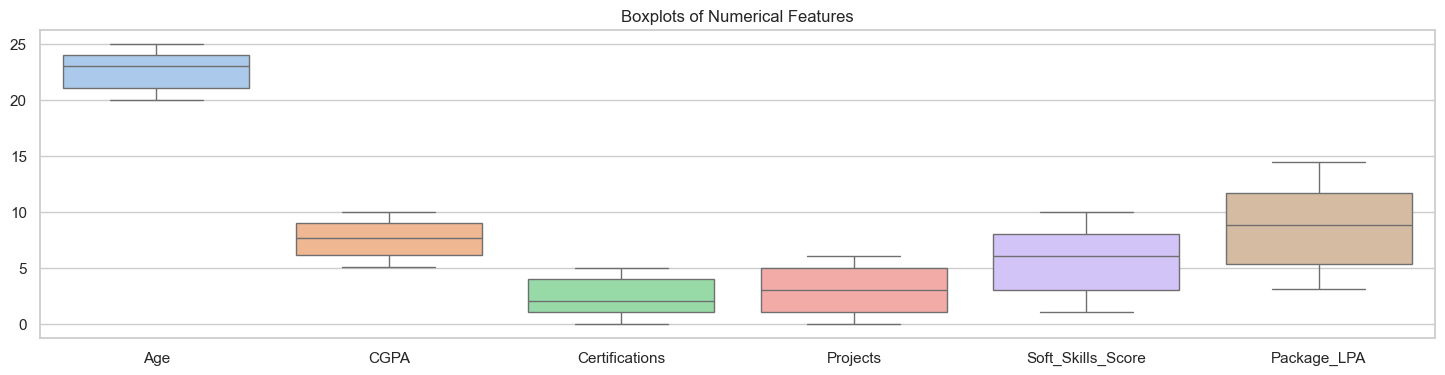

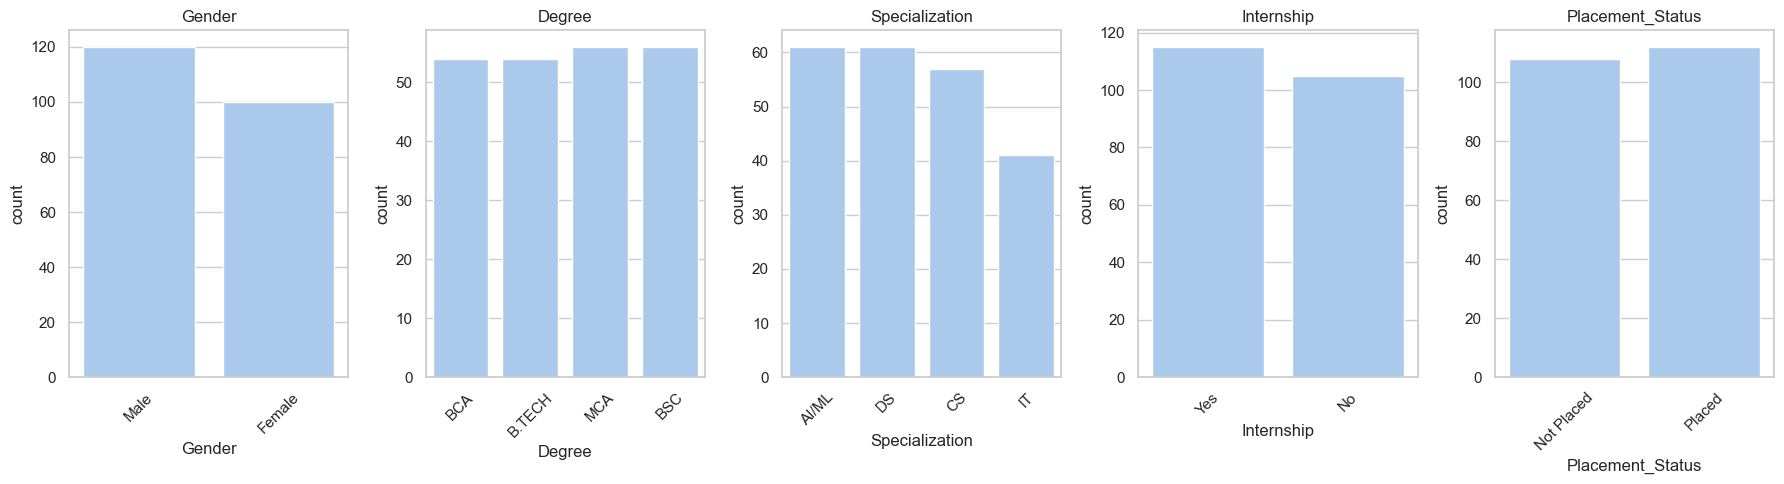

In [21]:
# --------------------------------------------
# 🧩 Step 6: Univariate Analysis
# --------------------------------------------
num_cols = ['Age', 'CGPA', 'Certifications', 'Projects', 'Soft_Skills_Score', 'Package_LPA']
cat_cols = ['Gender', 'Degree', 'Specialization', 'Internship', 'Placement_Status']

# Histograms
df[num_cols].hist(figsize=(18, 7), bins=20, edgecolor="black")
plt.suptitle("Distribution of Numerical Columns")
plt.show()

# Boxplots
plt.figure(figsize=(18, 4))
sns.boxplot(data=df[num_cols])
plt.title("Boxplots of Numerical Features")
plt.show()

# Categorical Countplots
fig, axes = plt.subplots(1, len(cat_cols), figsize=(18, 5))
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


7 - Bivariate Analysis

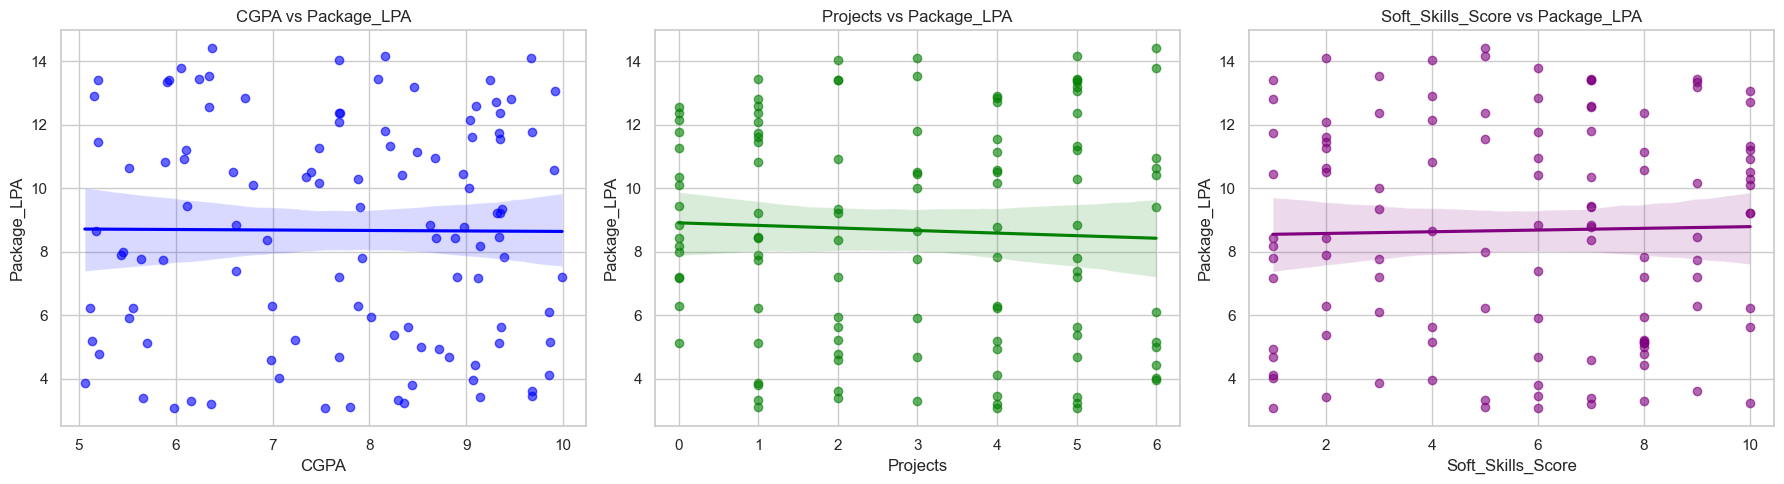

In [22]:
# --------------------------------------------
# 🧩 Step 7: Bivariate Relationships
# --------------------------------------------
scatter_cols = ['CGPA', 'Projects', 'Soft_Skills_Score']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ["blue", "green", "purple"]

for i, col in enumerate(scatter_cols):
    sns.regplot(data=df, x=col, y='Package_LPA', ax=axes[i], scatter_kws={'alpha':0.6} , color=colors[i])
    axes[i].set_title(f"{col} vs Package_LPA")

plt.tight_layout()
plt.show()

8 - Crosstab Analysis

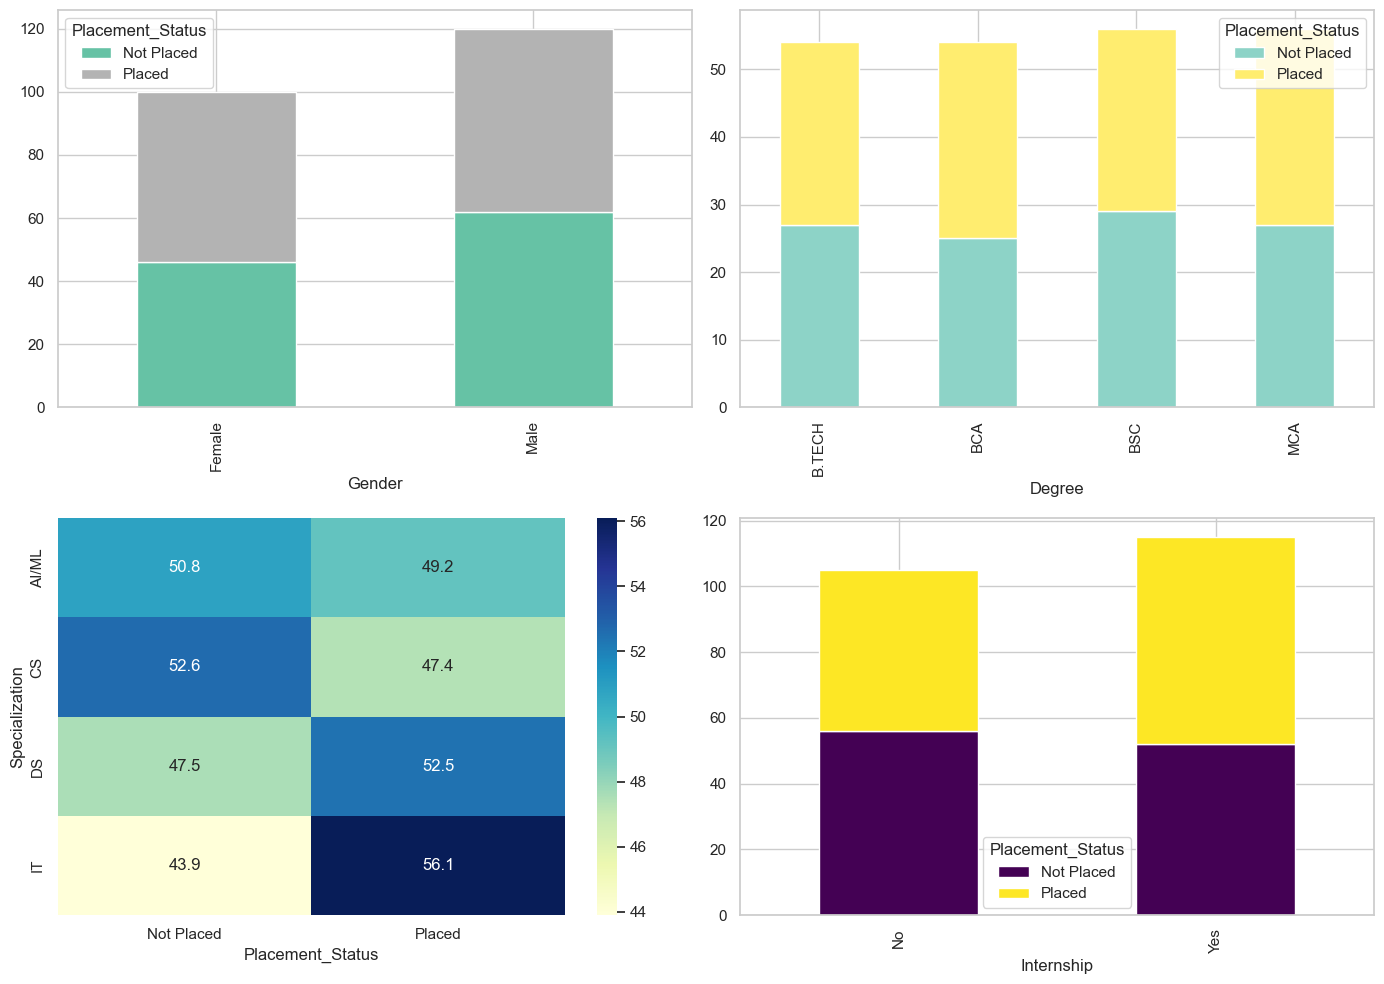

In [23]:
# --------------------------------------------
# 🧩 Step 8: Categorical Relationships (Crosstab)
# --------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Gender vs Placement
pd.crosstab(df['Gender'], df['Placement_Status']).plot(kind='bar', stacked=True, ax=axes[0], colormap="Set2")

# Degree vs Placement
pd.crosstab(df['Degree'], df['Placement_Status']).plot(kind='bar', stacked=True, ax=axes[1], colormap="Set3")

# Specialization vs Placement
ct3 = pd.crosstab(df['Specialization'], df['Placement_Status'], normalize="index") * 100
sns.heatmap(ct3, annot=True, fmt=".1f", cmap="YlGnBu", ax=axes[2])

# Internship vs Placement
pd.crosstab(df['Internship'], df['Placement_Status']).plot(kind='bar', stacked=True, ax=axes[3], colormap="viridis")

plt.tight_layout()
plt.show()


9 - Outlier Detection & Treatment

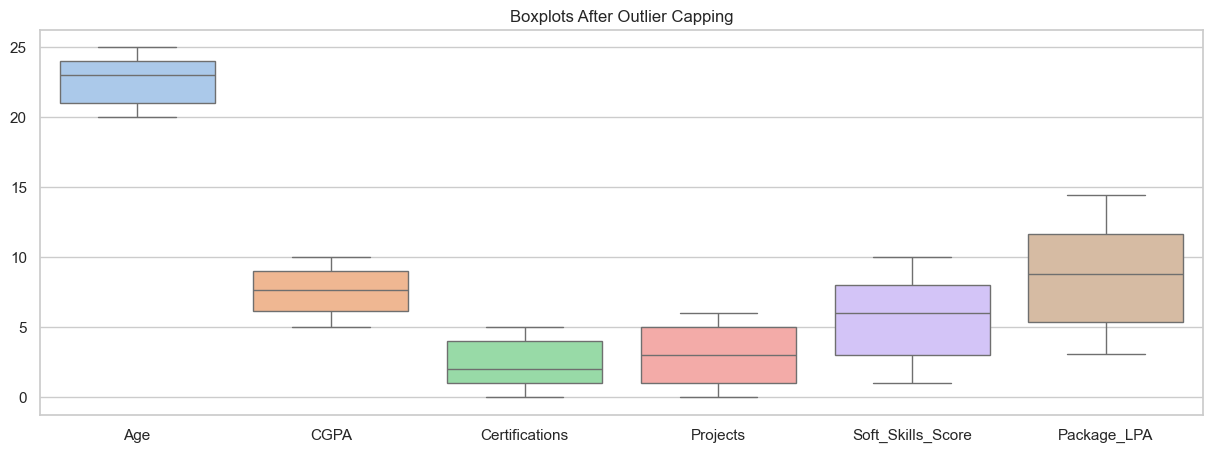

In [24]:
# --------------------------------------------
# 🧩 Step 9: Outlier Detection & Capping
# --------------------------------------------
def cap_outliers(data, col):
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    data[col] = np.clip(data[col], lower, upper)
    return data

for col in num_cols:
    df = cap_outliers(df, col)

plt.figure(figsize=(15, 5))
sns.boxplot(data=df[num_cols])
plt.title("Boxplots After Outlier Capping")
plt.show()


10 - Placement Insights Summary

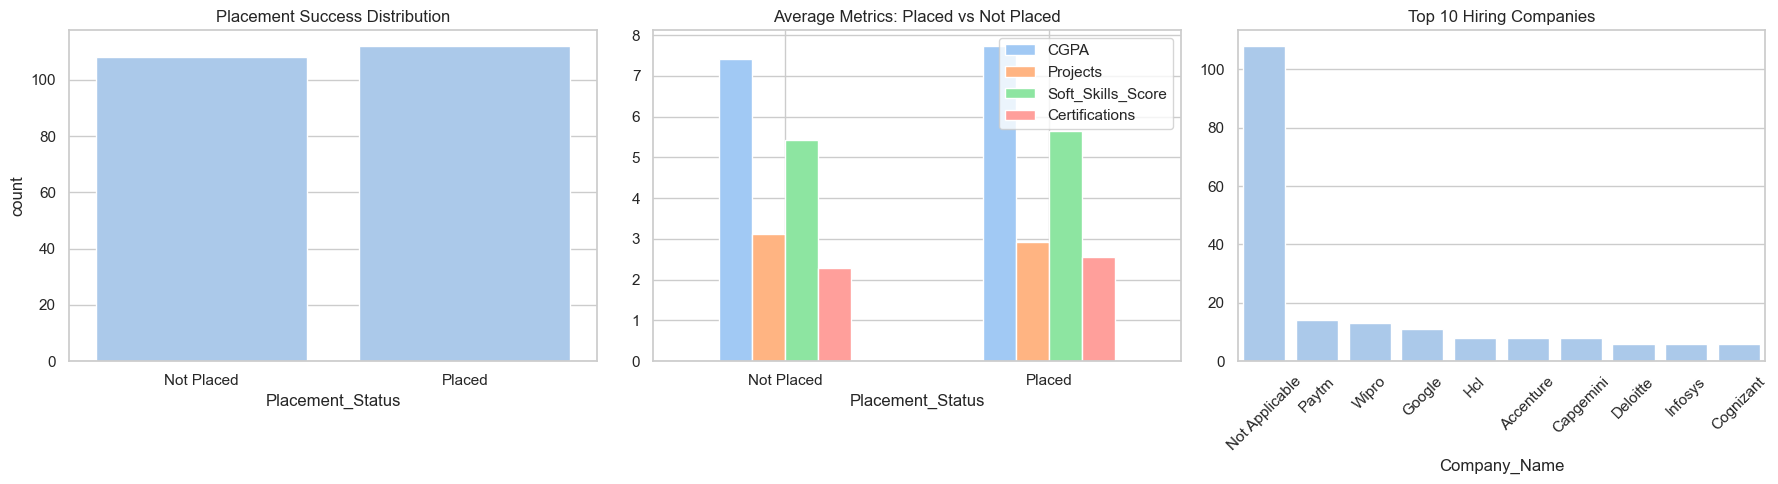

In [25]:
# --------------------------------------------
# 🧩 Step 10: Placement Insights & Summary Plots
# --------------------------------------------
# Define metrics
avg_comparison = df.groupby('Placement_Status')[['CGPA', 'Projects', 'Soft_Skills_Score', 'Certifications']].mean()
top_companies = df['Company_Name'].value_counts().head(10)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Placement Status Count
sns.countplot(data=df, x='Placement_Status', ax=axes[0])
axes[0].set_title("Placement Success Distribution")

# Average Comparison
avg_comparison.plot(kind='bar', ax=axes[1])
axes[1].set_title("Average Metrics: Placed vs Not Placed")
axes[1].tick_params(axis='x', rotation=0)

# Top Companies
sns.barplot(x=top_companies.index, y=top_companies.values, ax=axes[2])
axes[2].set_title("Top 10 Hiring Companies")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# --------------------------------------------
# Feature Engineering & Model Building
# --------------------------------------------

1 - Data Cleaning & Preprocessing

In [26]:
# Drop irrelevant or unique columns
df = df.drop(['Student_ID', 'Name', 'Placement_Date'], axis=1, errors='ignore')

# Handle missing values
df = df.fillna(0)

# Identify categorical columns
cat_cols = ['Gender', 'Degree', 'Specialization', 'Internship', 'Company_Name', 'Placement_Status']

# Copy dataset
df_encoded = df.copy()

# Label Encoding for binary columns
le = LabelEncoder()
binary_cols = ['Gender', 'Internship', 'Placement_Status']
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-Hot Encoding for multi-category columns
df_encoded = pd.get_dummies(df_encoded, columns=['Degree', 'Specialization', 'Company_Name'], drop_first=True)

print("✅ Data preprocessing completed successfully!")
print("Encoded DataFrame shape:", df_encoded.shape)

print("\nFirst 5 Rows:")
display(df.head())

print("\nDataset Info:")
df.info()


✅ Data preprocessing completed successfully!
Encoded DataFrame shape: (220, 30)

First 5 Rows:


,Gender,Age,Degree,Specialization,CGPA,Internship,Certifications,Projects,Soft_Skills_Score,Placement_Status,Package_LPA,Company_Name
0,Male,22,BCA,AI/ML,8.12,Yes,3.0,0,5,Not Placed,0.00,Not Applicable
1,Male,20,B.TECH,DS,8.14,No,1.0,6,3,Not Placed,0.00,Not Applicable
2,Male,21,MCA,DS,8.97,No,2.0,3,1,Placed,10.44,Accenture
3,Female,20,BCA,AI/ML,8.94,No,4.0,6,8,Not Placed,0.00,Not Applicable
4,Male,23,BSC,AI/ML,6.24,No,3.0,2,1,Not Placed,0.00,Not Applicable



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             220 non-null    object 
 1   Age                220 non-null    Int64  
 2   Degree             220 non-null    object 
 3   Specialization     220 non-null    object 
 4   CGPA               220 non-null    float64
 5   Internship         220 non-null    object 
 6   Certifications     220 non-null    float64
 7   Projects           220 non-null    int64  
 8   Soft_Skills_Score  220 non-null    int64  
 9   Placement_Status   220 non-null    object 
 10  Package_LPA        220 non-null    float64
 11  Company_Name       220 non-null    object 
dtypes: Int64(1), float64(3), int64(2), object(6)
memory usage: 22.6+ KB


2 - Define Features, Target & Feature Scaling

In [27]:
# Define target variable
target_column = 'Placement_Status_Placed' if 'Placement_Status_Placed' in df_encoded.columns else 'Placement_Status'

# Split features and target
y = df_encoded[target_column]
X = df_encoded.drop(target_column, axis=1)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("✅ Feature scaling completed!")
print("X shape:", X_scaled.shape)
print("y shape:", y.shape)


✅ Feature scaling completed!
X shape: (220, 29)
y shape: (220,)


3 - Train-Test Split & Model Training

In [28]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"✅ Data split completed! \nTraining samples: {len(X_train)}, Testing samples: {len(X_test)}")

# Initialize and train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print("✅ Random Forest model trained successfully!")


✅ Data split completed! 
Training samples: 176, Testing samples: 44
✅ Random Forest model trained successfully!


4 - Model Evaluation

In [29]:
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate model
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Random Forest Accuracy: {acc:.2f}\n")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("🌀 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


🎯 Random Forest Accuracy: 1.00

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        29

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44

🌀 Confusion Matrix:
[[15  0]
 [ 0 29]]


In [30]:
cleaned_df = df
cleaned_df.to_csv("placement_cleaned_dataset.csv", index=False)

In [32]:
df.head()

,Gender,Age,Degree,Specialization,CGPA,Internship,Certifications,Projects,Soft_Skills_Score,Placement_Status,Package_LPA,Company_Name
0,Male,22,BCA,AI/ML,8.12,Yes,3.0,0,5,Not Placed,0.00,Not Applicable
1,Male,20,B.TECH,DS,8.14,No,1.0,6,3,Not Placed,0.00,Not Applicable
2,Male,21,MCA,DS,8.97,No,2.0,3,1,Placed,10.44,Accenture
3,Female,20,BCA,AI/ML,8.94,No,4.0,6,8,Not Placed,0.00,Not Applicable
4,Male,23,BSC,AI/ML,6.24,No,3.0,2,1,Not Placed,0.00,Not Applicable


In [36]:
cleaned_df.head()

,Gender,Age,Degree,Specialization,CGPA,Internship,Certifications,Projects,Soft_Skills_Score,Placement_Status,Package_LPA,Company_Name
0,Male,22,BCA,AI/ML,8.12,Yes,3.0,0,5,Not Placed,0.00,Not Applicable
1,Male,20,B.TECH,DS,8.14,No,1.0,6,3,Not Placed,0.00,Not Applicable
2,Male,21,MCA,DS,8.97,No,2.0,3,1,Placed,10.44,Accenture
3,Female,20,BCA,AI/ML,8.94,No,4.0,6,8,Not Placed,0.00,Not Applicable
4,Male,23,BSC,AI/ML,6.24,No,3.0,2,1,Not Placed,0.00,Not Applicable
